In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
data= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    batch_size=32,
    image_size=(256, 256),    
)

Found 2152 files belonging to 3 classes.


In [3]:
class_name = data.class_names


In [4]:
len(data)

68

In [5]:
0.8*len(data)

54.400000000000006

In [6]:
train_data = data.take(54)

In [7]:
test_data = data.skip(54)

In [8]:
valid_data = test_data.take(7)
test_data = test_data.skip(7)

In [9]:
train_data= train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data= valid_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize = tf.keras.Sequential([ 
    tf.keras.layers.Resizing(256, 256),   
    tf.keras.layers.Rescaling(scale=1./255),   
])

In [11]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.1),
])

In [12]:
model = keras.Sequential([
    resize, 
    augmentation,  
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax"),  
])

model.build( input_shape=(64,256, 256, 3)),
model.summary

/Users/harshitagill/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


<bound method Model.summary of <Sequential name=sequential_2, built=True>>

In [13]:
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

In [14]:
model.fit(
    train_data,
    epochs=50,
    batch_size=64,
    verbose=1, 

    validation_data=valid_data
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 845ms/step - accuracy: 0.4581 - loss: 0.9626 - val_accuracy: 0.6027 - val_loss: 1.0797
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 841ms/step - accuracy: 0.8221 - loss: 0.4970 - val_accuracy: 0.7679 - val_loss: 0.7442
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 912ms/step - accuracy: 0.8384 - loss: 0.3737 - val_accuracy: 0.8973 - val_loss: 0.3065
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8933 - loss: 0.2929 - val_accuracy: 0.9554 - val_loss: 0.1601
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 928ms/step - accuracy: 0.9497 - loss: 0.1506 - val_accuracy: 0.9777 - val_loss: 0.0774
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 774ms/step - accuracy: 0.9447 - loss: 0.1428 - val_accuracy: 0.7991 - val_loss: 0.6205
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 763ms/step - accuracy: 0.9482 - loss: 0.1550 - val_accuracy: 0.9330 - val_loss: 0.1618
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 676ms/step - accuracy: 0.9374 - loss: 0.1732 - val_accurac

In [15]:
scores = model.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9838 - loss: 0.0238


2024-04-14 14:25:46.968228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


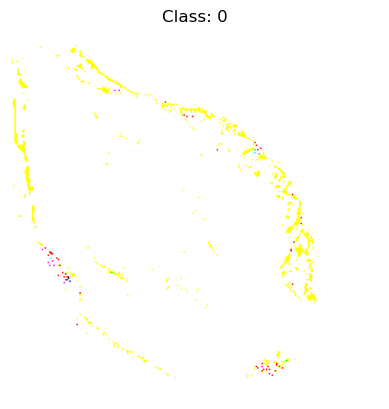

In [16]:
for image_batch, label_batch in test_data.take(1):  
    image = image_batch[0]
    label = label_batch[0]  

image = tf.clip_by_value(image, 0.0, 1.0)

plt.imshow(image.numpy())
plt.title('Class: ' + str(label.numpy()))
plt.axis('off')
plt.show()

Image to predict
Actual Label  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label  Potato___Early_blight


2024-04-14 14:45:10.387814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


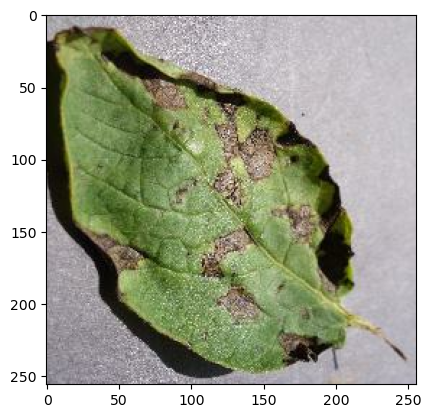

In [61]:
for image_batch, label_batch in test_data.take(1):  
    image = image_batch[0].numpy().astype('uint8')  
    label = label_batch[0] 

    print("Image to predict")
    plt.imshow(image)
    print("Actual Label " , class_name[label])

    # Add a batch dimension to the image
    image = np.expand_dims(image, axis=0)

    ans = model.predict(image)
    print("Predicted Label " , class_name[np.argmax(ans[0])] )


